In [1]:
from PIL import Image
import os
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import json
import numpy as np

In [4]:

# 이미지들이 저장된 폴더 경로
image_folder = "/root/data/datasets/remove_background/train"

# 가로, 세로 길이를 저장할 리스트
image_sizes = []

# 폴더 내 모든 이미지 파일에 대해 크기 체크
for image_file in os.listdir(image_folder):
    if image_file.endswith(('.png', '.jpg', '.jpeg')):  # 이미지 파일 확장자 체크
        image_path = os.path.join(image_folder, image_file)
        with Image.open(image_path) as img:
            width, height = img.size
            image_sizes.append((image_file, width, height))


In [5]:

# DataFrame으로 변환
df = pd.DataFrame(image_sizes, columns=['filename', 'width', 'height'])

In [6]:
df

,filename,width,height
0,drp.en_ko.in_house.selectstar_002759.jpg,561,1175
1,drp.en_ko.in_house.selectstar_003224.jpg,590,1240
2,drp.en_ko.in_house.selectstar_003686.jpg,661,1104
3,drp.en_ko.in_house.selectstar_000504.jpg,527,1200
4,drp.en_ko.in_house.selectstar_003909.jpg,585,1129
...,...,...,...
3267,drp.en_ko.in_house.selectstar_002011.jpg,292,1236
3268,drp.en_ko.in_house.selectstar_002854.jpg,757,1279
3269,drp.en_ko.in_house.selectstar_003608.jpg,600,1203
3270,drp.en_ko.in_house.selectstar_001938.jpg,688,1280


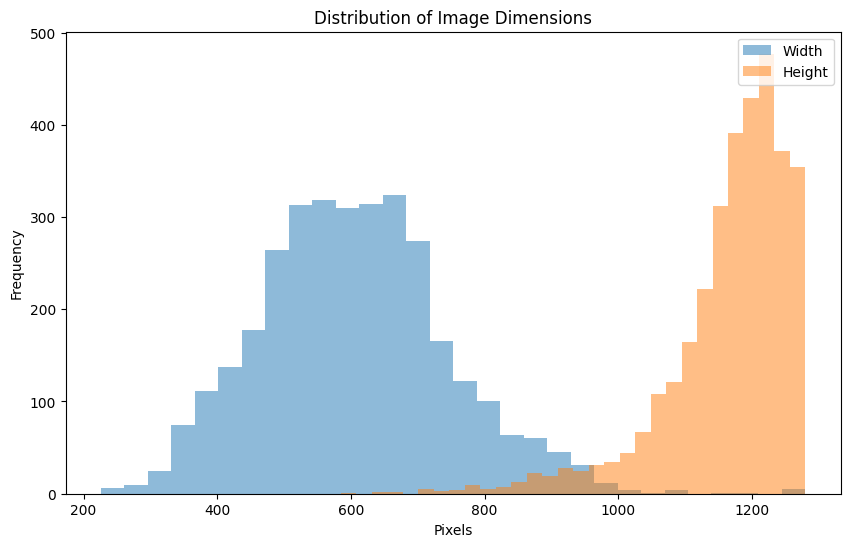

In [7]:
# EDA: 이미지 크기 분포 시각화
plt.figure(figsize=(10, 6))
plt.hist(df['width'], bins=30, alpha=0.5, label='Width')
plt.hist(df['height'], bins=30, alpha=0.5, label='Height')
plt.title('Distribution of Image Dimensions')
plt.xlabel('Pixels')
plt.ylabel('Frequency')
plt.legend(loc='upper right')
plt.show()

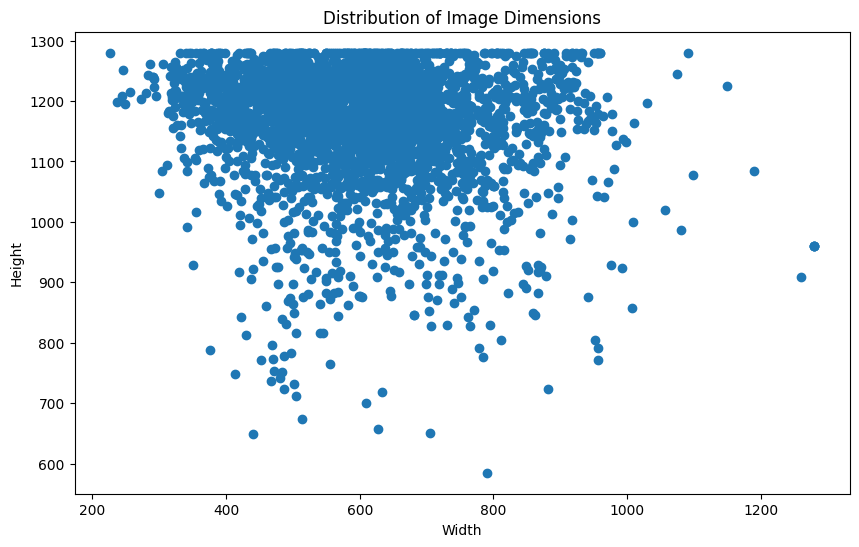

In [8]:
# EDA: 이미지 크기 분포 시각화
plt.figure(figsize=(10, 6))
plt.scatter(df['width'], df['height'])
plt.title('Distribution of Image Dimensions')
plt.xlabel('Width')
plt.ylabel('Height')
plt.show()

In [9]:
# hight, width 분포
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3272 entries, 0 to 3271
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   filename  3272 non-null   object
 1   width     3272 non-null   int64 
 2   height    3272 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 76.8+ KB


In [10]:
df.describe()

,width,height
count,3272.000000,3272.000000
mean,606.014059,1165.286064
std,140.953615,95.327443
min,226.000000,585.000000
25%,509.000000,1129.000000
50%,601.000000,1187.000000
75%,690.000000,1229.000000
max,1280.000000,1280.000000


In [11]:
# 가로 폭 길이 분포
df['width'].value_counts().sort_index(ascending=False)

width
1280    4
1260    1
1190    1
1150    1
1099    1
       ..
249     1
246     1
245     1
237     1
226     1
Name: count, Length: 637, dtype: int64

In [12]:
# 가로 폭 길이를 많은 개수 순으로
df['width'].value_counts().sort_values(ascending=False)

width
661     16
550     16
647     16
504     16
495     16
        ..
1007     1
245      1
848      1
933      1
853      1
Name: count, Length: 637, dtype: int64

In [13]:
# 높이를 개수별로 분류
df['height'].value_counts().sort_index(ascending=False)

height
1280     31
1279    173
1277      1
1276      1
1275      7
       ... 
674       1
658       1
651       1
649       1
585       1
Name: count, Length: 404, dtype: int64

In [14]:
# 높이 길이를 많은 개수 순으로
df['height'].value_counts().sort_values(ascending=False)

height
1279    173
1280     31
1236     30
1204     30
1218     30
       ... 
871       1
995       1
855       1
863       1
1276      1
Name: count, Length: 404, dtype: int64

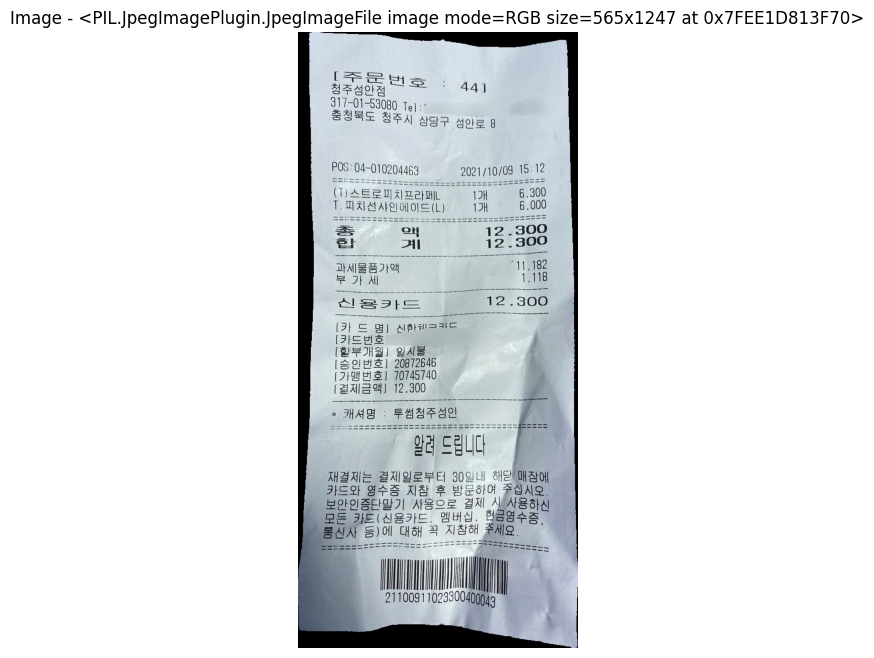

In [15]:
# 이미지 체크


image_file = 'drp.en_ko.in_house.selectstar_000003.jpg'

image_path = image_folder +'/'+ image_file

with Image.open(image_path) as img:
    width, height = img.size
    plt.figure(figsize=(10, 8))
    plt.imshow(img)
    plt.title(f"Image - {img}")
    plt.axis('off')
    plt.show()


In [17]:
df

,filename,width,height
0,drp.en_ko.in_house.selectstar_002759.jpg,561,1175
1,drp.en_ko.in_house.selectstar_003224.jpg,590,1240
2,drp.en_ko.in_house.selectstar_003686.jpg,661,1104
3,drp.en_ko.in_house.selectstar_000504.jpg,527,1200
4,drp.en_ko.in_house.selectstar_003909.jpg,585,1129
...,...,...,...
3267,drp.en_ko.in_house.selectstar_002011.jpg,292,1236
3268,drp.en_ko.in_house.selectstar_002854.jpg,757,1279
3269,drp.en_ko.in_house.selectstar_003608.jpg,600,1203
3270,drp.en_ko.in_house.selectstar_001938.jpg,688,1280


In [19]:
df[(df['width'] != 1280) & (df['height'] != 1280)]

,filename,width,height
0,drp.en_ko.in_house.selectstar_002759.jpg,561,1175
1,drp.en_ko.in_house.selectstar_003224.jpg,590,1240
2,drp.en_ko.in_house.selectstar_003686.jpg,661,1104
3,drp.en_ko.in_house.selectstar_000504.jpg,527,1200
4,drp.en_ko.in_house.selectstar_003909.jpg,585,1129
...,...,...,...
3265,drp.en_ko.in_house.selectstar_002245.jpg,633,1064
3266,drp.en_ko.in_house.selectstar_003256.jpg,559,1152
3267,drp.en_ko.in_house.selectstar_002011.jpg,292,1236
3268,drp.en_ko.in_house.selectstar_002854.jpg,757,1279


In [4]:
# 이미지의 폴리곤 데이터를 불러옴

json_file = 'C:/Users/CHOI Je Woo/Desktop/ocr_대회/datasets/jsons/train.json'

# JSON 파일 읽기
with open(json_file, 'r') as f:
    data = json.load(f)


drp.en_ko.in_house.selectstar_000356.jpg


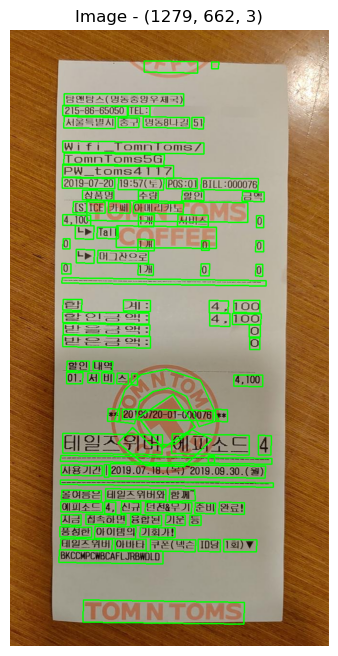

drp.en_ko.in_house.selectstar_000555.jpg


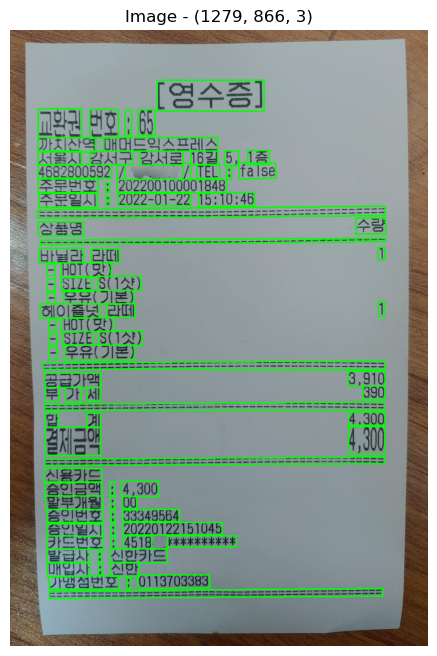

drp.en_ko.in_house.selectstar_000591.jpg


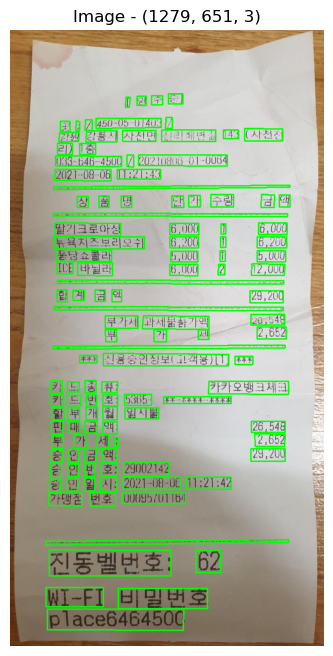

drp.en_ko.in_house.selectstar_001059.jpg


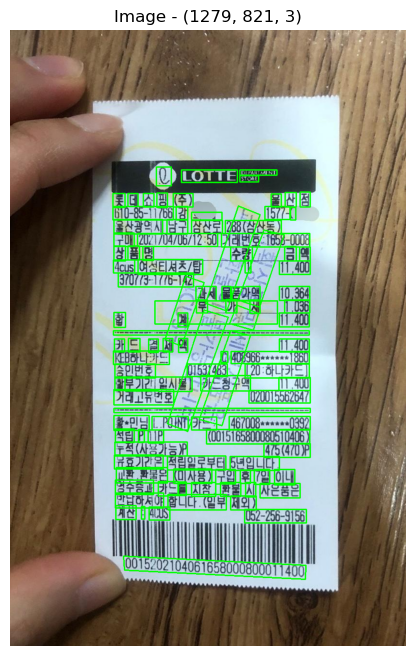

drp.en_ko.in_house.selectstar_002716.jpg


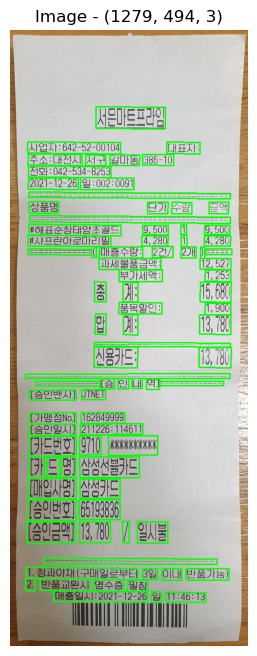

In [21]:
# 넓이와 높이가 모두 1280인 이미지들 확인
for image in df[(df['width'] != 1280) & (df['height'] != 1280)]['filename']:
    image_file = image

    image_path = image_folder +'/'+ image_file
    # print(image_path)
    image = cv2.imread(image_path)
    
    if image is None:
        print(f"이미지를 불러올 수 없습니다: {image_path}")
        continue
    
    # 단어별로 좌표(points)를 가져와서 그리기
    for word_id, word_data in data['images'][image_file]['words'].items():
        points = np.array(word_data['points'], dtype=np.int32)
        points = points.reshape((-1, 1, 2))  # 폴리곤을 그리기 위한 형식 변환
        cv2.polylines(image, [points], isClosed=True, color=(0, 255, 0), thickness=2)

    # BGR 이미지를 RGB로 변환 (matplotlib는 RGB 형식 사용)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    print(image_file)
    plt.figure(figsize=(10, 8))
    plt.imshow(image_rgb)
    plt.title(f"Image - {image.shape}")
    plt.axis('off')
    plt.show()
    # break